<a href="https://colab.research.google.com/github/lelouch0204/CSF425-Deep-Learning/blob/main/Assignment-3-Forehead%20matching/ArcFace_SSIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !pip uninstall opencv-python
!pip install opencv-contrib-python==3.4.2.17

Found existing installation: opencv-python 4.1.2.30
Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6 MB 26 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
!pip install arcface

     |████████████████████████████████| 62 kB 817 kB/s 
     |████████████████████████████████| 596 kB 24.1 MB/s 
     |████████████████████████████████| 49.9 MB 17 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt 
import os
from natsort import natsorted
from arcface import ArcFace
from scipy.spatial import distance
from skimage.metrics import structural_similarity

In [ ]:
data_root = '/content/drive/MyDrive/Datasets/Ass-3'
data_path = '/content/drive/MyDrive/Datasets/Ass-3/foreheadData'

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
def preprocess(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ##img = cv2.equalizeHist(img)
    img = cv2.GaussianBlur(img, (3, 3), 0)
    clahe = cv2.createCLAHE(clipLimit=5.0)
    img = clahe.apply(img)
    ##img = cv2.Canny(img)
    return img

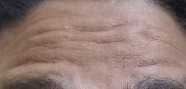

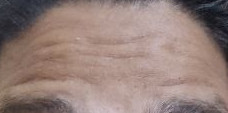

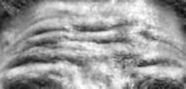

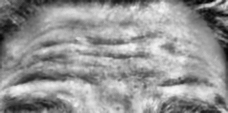

(None, None)

In [ ]:
temp_img1 = cv2.imread('/content/drive/MyDrive/Datasets/Ass-3/foreheadData/10_P1_S1_1.jpg')
temp_img2 = cv2.imread('/content/drive/MyDrive/Datasets/Ass-3/foreheadData/10_P1_S1_2.jpg')
cv2_imshow(temp_img1), cv2_imshow(temp_img2)

temp_img1 = preprocess(temp_img1)
temp_img2 = preprocess(temp_img2)
cv2_imshow(temp_img1), cv2_imshow(temp_img2)

In [ ]:
face_rec = ArcFace.ArcFace()
emb1 = face_rec.calc_emb(temp_img1)
emb2 = face_rec.calc_emb(temp_img2)

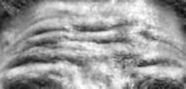

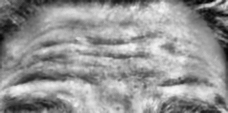

0.2185711
0.10928553342819214


In [ ]:
cv2_imshow(temp_img1), cv2_imshow(temp_img2)
print(face_rec.get_distance_embeddings(emb1, emb2))
print(distance.cosine(emb1, emb2))

In [ ]:
output_SIFT_1 = []
genuine = []
imposter = []
for images in natsorted(os.listdir(data_path)):
    str1 = str(images)
    if str1=='.ipynb_checkpoints':
        continue
    img1 = os.path.join(data_path, images)
    img1 = cv2.imread(img1)
    img1 = preprocess(img1)
    emb1 = face_rec.calc_emb(img1)
    if len(emb1)>0:
       for image in natsorted(os.listdir(data_path)):
           img2 = os.path.join(data_path, image)
           str2 = str(image)
           if str1 == '.ipynb_checkpoints' or str2 == '.ipynb_checkpoints':
               continue
           if (str1.split("_")[2]==str2.split("_")[2]):
               continue
           if (img1 != img2):
               img2 = cv2.imread(img2)
               img2 = preprocess(img2)
               emb2 = face_rec.calc_emb(img2)
          
               if emb1 is None:
                 output_SIFT_1.append([str1, str2, 0])
                 print(str1 + " " + str2 + " " + str(0))
                 continue
               if emb2 is None:
                 output_SIFT_1.append([str1, str2, 0])
                 print(str1 + " " + str2 + " " + str(0))
                 continue
               dist = distance.cosine(emb1, emb2)
               print(str1 + " " + str2 + " " + str(dist))
               output_SIFT_1.append([str1, str2, dist])
               if (str1.split("_")[0]==str2.split("_")[0]):
                   genuine.append(dist)
               else:
                   imposter.append(dist)

In [ ]:
output_df = pd.DataFrame(output_SIFT_1)
output_df.head()

,0,1,2
0,1_P1_S1_1.jpg,1_P1_S2_1.jpg,0.353234
1,1_P1_S1_1.jpg,1_P1_S2_2.jpg,0.397766
2,1_P1_S1_1.jpg,1_P1_S2_3.jpg,0.263788
3,1_P1_S1_1.jpg,1_P2_S2_1.jpg,0.446029
4,1_P1_S1_1.jpg,1_P2_S2_2.jpg,0.533573


In [ ]:
output_file = data_root + '/' + 'output_ARC_2.csv'

In [ ]:
output_df.to_csv(output_file)

In [ ]:
len(imposter), len(genuine)

(54432, 2016)

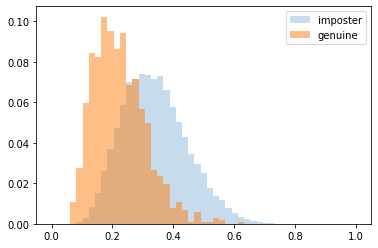

In [ ]:
bins = np.linspace(0, 1, 50)
from matplotlib import pyplot
pyplot.hist(imposter, bins, alpha=0.25, label='imposter', weights=np.ones(len(imposter)) / len(imposter), histtype = 'stepfilled', align = 'mid')
pyplot.hist(genuine, bins, alpha=0.5, label='genuine', weights=np.ones(len(genuine)) / len(genuine), histtype = 'stepfilled')
pyplot.legend(loc='upper right')
fig_loc = data_root + '/' + 'output_ARC_2.png'
pyplot.savefig(fig_loc)
pyplot.show()

In [ ]:
output_file = data_path + '/output_SSIM_1.csv'

In [ ]:
output_SSIM = []
genuine_SSIM = []
imposter_SSIM = []
for images in natsorted(os.listdir(data_path)):
    str1 = str(images)
    if str1=='.ipynb_checkpoints':
        continue
    img1 = os.path.join(data_path, images)
    img1 = cv2.imread(img1)
    img1 = preprocess(img1)
    for image in natsorted(os.listdir(data_path)):
        img2 = os.path.join(data_path, image)
        str2 = str(image)
        if str1 == '.ipynb_checkpoints' or str2 == '.ipynb_checkpoints':
            continue
        if (str1.split("_")[2]==str2.split("_")[2]):
            continue
        if (img1 != img2):
            img2 = cv2.imread(img2)
            img2 = preprocess(img2)
            img2 = cv2.resize(img2,(img1.shape[1],img1.shape[0]))
            score, _ = structural_similarity(img1, img2, full=True)
            print(str1 + " " + str2 + " " + str(score))
            output_SSIM.append([str1, str2, score])
            if (str1.split("_")[0]==str2.split("_")[0]):
                genuine_SSIM.append(score)
            else:
                imposter_SSIM.append(score)
output_df_SSIM = pd.DataFrame(output_SSIM)
output_df_SSIM.to_csv(output_file)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Streaming output truncated to the last 5000 lines.
26_P2_S1_1.jpg 7_P2_S2_2.jpg 0.14561757357216637
26_P2_S1_1.jpg 7_P2_S2_3.jpg 0.15197395276485967
26_P2_S1_1.jpg 8_P1_S2_1.jpg 0.14104814813444203
26_P2_S1_1.jpg 8_P1_S2_2.jpg 0.13005401938637734
26_P2_S1_1.jpg 8_P1_S2_3.jpg 0.1086969937586395
26_P2_S1_1.jpg 8_P2_S2_1.jpg 0.11274450495532835
26_P2_S1_1.jpg 8_P2_S2_2.jpg 0.1298320182457896
26_P2_S1_1.jpg 8_P2_S2_3.jpg 0.13436115853676828
26_P2_S1_1.jpg 9_P1_S2_1.jpg 0.11334533484382925
26_P2_S1_1.jpg 9_P1_S2_2.jpg 0.07876257178504055
26_P2_S1_1.jpg 9_P1_S2_3.jpg 0.06461765834415727
26_P2_S1_1.jpg 9_P2_S2_1.jpg 0.048035010803995824
26_P2_S1_1.jpg 9_P2_S2_2.jpg -0.0023178664725041205
26_P2_S1_1.jpg 9_P2_S2_3.jpg 0.02509623374754138
26_P2_S1_1.jpg 10_P1_S2_1.jpg 0.18415442333005944
26_P2_S1_1.jpg 10_P1_S2_2.jpg 0.15010948614884917
26_P2_S1_1.jpg 10_P1_S2_3.jpg 0.14369023526290714
26_P2_S1_1.jpg 10_P2_S2_1.jpg 0.16192451316611392
26_P2_S1_1.jpg 10_P2_S2_2.jpg 0.15822909073203514
26_P2_S1_1.